In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import plot_model
from keras import *
from sklearn import preprocessing
#from IPython.display import SVG
#from keras.utils import model_to_dot
import keras.backend as K

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/Users/saiganesh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2.0.0


### Generate Data


### Create the Neural networks for the regression task

We are going to vary the depth of the neural network as follows (excluding the input and the output layer), with depth d=1,2,3,4,5. We are going to fix the neurons for each layer to be 20, for our regression task. Each model adds one extra hidden layer. We are using the same parameters to train all networks and we require the training error or the mean squared error to tend to 0 during the training procedure, i.e, we will try and overfit the data (as we try to demonstrate a representation result, rather than a statistical/generalization result). Thus, for the actual training we use the same parameters to train all the different models using "ADAM" optimizer and make the epochs to be 1500 in order to enable overfitting. To record the training error, we verify that the training saturates by seeing the performance over the epochs and report by default the error in the last epoch.

#### The Regression Task

We create a regression task that is based on the theory connecting periods and Lipschitz constants. So the function we want to regress is the composition of $f(x):=1-\rho|x|$, where, $\rho=1.618$, the golden ratio. The function has a Lipschitz constant of $\rho$ and exhibits a period 3 property. Here we create "hard task" where beyond a certain composition of the function there is a constant lower bound on the $L^1$ error. 

In particular, theory suggests that for a fixed width $u$ and depth $l$, as long as the condition stated in the theorem is satisfied, i.e., $(2u)^l \leq \frac{\rho^t}{8}$, then we have an error bound that is *independent* of the width and depth. We indeed validate this and the $L^1$ error we get from theory almost matches the experimental error. Rewriting the condition of Theorem 3.2, for a fixed width and depth, there is a large $t\geq \frac{(l+3)\ln(2)+l\ln(u)}{\ln(\rho)} \approx 31$, which is obtained when $l=5$,$u=20$ and $\rho=1.618$. According to Theorem 3.2 in the paper, this always produces constant error of approximately 0.2.

So let us consider the 40th composition of this function, i.e, $f^{40}(x)$.  Since, it is generally tedious to construct the higher order compositions of these functions in closed form, in order to obtain "samples" from this function, we uniformly randomly initialize the starting points in the $[0,1]$ interval and simply run the discrete dynamical system $x_{k+1}=f(x_k)$ for 40 steps, to obtain samples of the 40th composition of $f$. 

Any addititional uncertainties in the error is generally attributed to the training procedure.

In [3]:
#Input data goes here-Generate data for the regression task
np.random.seed(42);
n=10000 #10000 default 
rho=1.618
y_train=np.zeros((n,1))
x_train=np.random.uniform(size=(n,1));
for i in range(n):
 x_temp=x_train[i,0]
 for j in range(40): #40 compositions of the function
    x_temp=1-rho*np.abs(x_temp);
 y_train[i,0]=x_temp;   

#### Depth d=1

In [4]:
model1 = Sequential()
model1.add(Dense(20, input_dim=1, activation='relu',
                bias_initializer='zeros'))
model1.add(Dense(20, activation='relu',bias_initializer='zeros'))
model1.add(Dense(1, activation='linear'))

In [5]:
model1.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

history=model1.fit(x_train, y_train,
          epochs=1500,
          batch_size=80,verbose=1)

Epoch 1/1500
10000/10000 [==============================] - 1s 59us/step - loss: 0.2159 - accuracy: 0.0000e+00
Epoch 2/1500
10000/10000 [==============================] - 0s 29us/step - loss: 0.1987 - accuracy: 0.0000e+00
Epoch 3/1500
10000/10000 [==============================] - 0s 26us/step - loss: 0.1981 - accuracy: 0.0000e+00
Epoch 4/1500
10000/10000 [==============================] - 0s 29us/step - loss: 0.1982 - accuracy: 0.0000e+00
Epoch 5/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1981 - accuracy: 0.0000e+00
Epoch 6/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1981 - accuracy: 0.0000e+00
Epoch 7/1500
10000/10000 [==============================] - 0s 26us/step - loss: 0.1982 - accuracy: 0.0000e+00
Epoch 8/1500
10000/10000 [==============================] - 0s 24us/step - loss: 0.1982 - accuracy: 0.0000e+00
Epoch 9/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1982 - accuracy: 0.0000e+00
E

10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 147/1500
10000/10000 [==============================] - 0s 16us/step - loss: 0.1981 - accuracy: 0.0000e+00
Epoch 148/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 149/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 150/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 151/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 152/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 153/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 154/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 291/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 292/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 293/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 294/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 295/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 296/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 297/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 298/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 435/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 436/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 437/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 438/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 439/1500
10000/10000 [==============================] - 0s 16us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 440/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 441/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 442/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 14us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 579/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 580/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 581/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 582/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 583/1500
10000/10000 [==============================] - 0s 14us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 584/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 585/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 586/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 723/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 724/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 725/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 726/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 727/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 728/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 729/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 730/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 867/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 868/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 869/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 870/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 871/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 872/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 873/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 874/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1011/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1012/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1013/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1014/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1015/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1016/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1017/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1018/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1083/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1084/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1085/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1086/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1087/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1088/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1089/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1090/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1155/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1156/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1157/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1158/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1159/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1160/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1161/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1162/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1227/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1228/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1229/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1230/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1231/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1232/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1233/1500
10000/10000 [==============================] - 0s 16us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1234/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1299/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1300/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1301/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1302/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1303/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1304/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1305/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1306/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1371/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1372/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1373/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1374/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1375/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1376/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1377/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1378/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0

10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1443/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1444/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1445/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1446/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1447/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1448/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1449/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1450/1500
10000/10000 [==============================] - 0s 15us/step - loss: 0.1979 - accuracy: 0

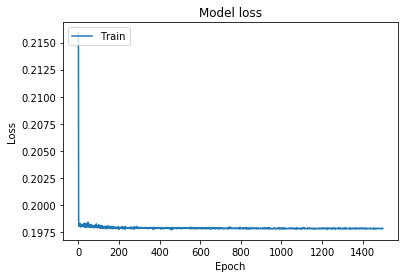

In [6]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Depth d=2

In [7]:
model2 = Sequential()
model2.add(Dense(20, input_dim=1, activation='relu',
                bias_initializer='zeros'))
model2.add(Dense(20, activation='relu',bias_initializer='zeros'))
model2.add(Dense(20, activation='relu',bias_initializer='zeros'))
model2.add(Dense(1, activation='linear'))

In [8]:
model2.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

history=model2.fit(x_train, y_train,
          epochs=1500,
          batch_size=80,verbose=1)

Epoch 1/1500
10000/10000 [==============================] - 0s 35us/step - loss: 0.2041 - accuracy: 0.0000e+00
Epoch 2/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1983 - accuracy: 0.0000e+00
Epoch 3/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1983 - accuracy: 0.0000e+00
Epoch 4/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1982 - accuracy: 0.0000e+00
Epoch 5/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1981 - accuracy: 0.0000e+00
Epoch 6/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1982 - accuracy: 0.0000e+00
Epoch 7/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1982 - accuracy: 0.0000e+00
Epoch 8/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1981 - accuracy: 0.0000e+00
Epoch 9/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1982 - accuracy: 0.0000e+00
E

10000/10000 [==============================] - 0s 17us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 147/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 148/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 149/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 150/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 151/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 152/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 153/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 154/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 291/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 292/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 293/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 294/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 295/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 296/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 297/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 298/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1980 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 435/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 436/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 437/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 438/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 439/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 440/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 441/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 442/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 579/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 580/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 581/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 582/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 583/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 584/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 585/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 586/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 723/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 724/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 725/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 726/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 727/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 728/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 729/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 730/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 867/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 868/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 869/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 870/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 871/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 872/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 873/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 874/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1011/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1012/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1013/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1014/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1015/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1016/1500
10000/10000 [==============================] - 0s 33us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1017/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1018/1500
10000/10000 [==============================] - 0s 38us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1083/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1084/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1085/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1086/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1087/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1088/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1089/1500
10000/10000 [==============================] - 0s 28us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1090/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1155/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1156/1500
10000/10000 [==============================] - 0s 16us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1157/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1158/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1159/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1160/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1161/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1162/1500
10000/10000 [==============================] - 0s 30us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1227/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1228/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1229/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1230/1500
10000/10000 [==============================] - 0s 16us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1231/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1232/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1233/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1234/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1978 - accuracy: 0

10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1299/1500
10000/10000 [==============================] - 0s 16us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1300/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1301/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1302/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1303/1500
10000/10000 [==============================] - 0s 16us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1304/1500
10000/10000 [==============================] - 0s 16us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1305/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1306/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1371/1500
10000/10000 [==============================] - 0s 16us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1372/1500
10000/10000 [==============================] - 0s 16us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1373/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1374/1500
10000/10000 [==============================] - 0s 16us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1375/1500
10000/10000 [==============================] - 0s 16us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1376/1500
10000/10000 [==============================] - 0s 16us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1377/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1378/1500
10000/10000 [==============================] - 0s 16us/step - loss: 0.1978 - accuracy: 0

10000/10000 [==============================] - 0s 16us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1443/1500
10000/10000 [==============================] - 0s 16us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1444/1500
10000/10000 [==============================] - 0s 16us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1445/1500
10000/10000 [==============================] - 0s 16us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1446/1500
10000/10000 [==============================] - 0s 17us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1447/1500
10000/10000 [==============================] - 0s 16us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1448/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1449/1500
10000/10000 [==============================] - 0s 25us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1450/1500
10000/10000 [==============================] - 0s 24us/step - loss: 0.1978 - accuracy: 0

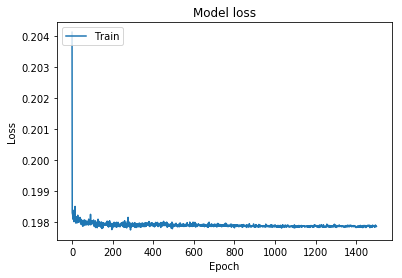

In [9]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Depth d=3

In [10]:
model3 = Sequential()
model3.add(Dense(20, input_dim=1, activation='relu',
                bias_initializer='zeros'))
model3.add(Dense(20, activation='relu',bias_initializer='zeros'))
model3.add(Dense(20, activation='relu',bias_initializer='zeros'))
model3.add(Dense(20, activation='relu',bias_initializer='zeros'))
model3.add(Dense(1, activation='linear'))

In [11]:
model3.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

history=model3.fit(x_train, y_train,
          epochs=1500,
          batch_size=80,verbose=1)

Epoch 1/1500
10000/10000 [==============================] - 0s 45us/step - loss: 0.2084 - accuracy: 0.0000e+00
Epoch 2/1500
10000/10000 [==============================] - 0s 24us/step - loss: 0.1985 - accuracy: 0.0000e+00
Epoch 3/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1983 - accuracy: 0.0000e+00
Epoch 4/1500
10000/10000 [==============================] - 0s 29us/step - loss: 0.1981 - accuracy: 0.0000e+00
Epoch 5/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1981 - accuracy: 0.0000e+00
Epoch 6/1500
10000/10000 [==============================] - 0s 28us/step - loss: 0.1981 - accuracy: 0.0000e+00
Epoch 7/1500
10000/10000 [==============================] - 0s 31us/step - loss: 0.1982 - accuracy: 0.0000e+00
Epoch 8/1500
10000/10000 [==============================] - 0s 34us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 9/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1982 - accuracy: 0.0000e+00
E

10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 147/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 148/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 149/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 150/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 151/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 152/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 153/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 154/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 291/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 292/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 293/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 294/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 295/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 296/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 297/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 298/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 435/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 436/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 437/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 438/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 439/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 440/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 441/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 442/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 19us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 579/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 580/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 581/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 582/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 583/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 584/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 585/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 586/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1978 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 723/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 724/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 725/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 726/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 727/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 728/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 729/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 730/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 867/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 868/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 869/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 870/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 871/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 872/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 873/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 874/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1011/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1012/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1013/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1014/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1015/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1016/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1017/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1018/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1083/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1084/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1085/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1086/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1087/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1088/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1089/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1090/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0

10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1155/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1156/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1157/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1158/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1159/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1160/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1161/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1162/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1227/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1228/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1229/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1230/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1231/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1232/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1233/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1234/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1299/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1300/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1301/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1302/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1303/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1304/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1305/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1306/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0

10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1371/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1372/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1373/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1374/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1375/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1376/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1377/1500
10000/10000 [==============================] - 0s 19us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1378/1500
10000/10000 [==============================] - 0s 18us/step - loss: 0.1978 - accuracy: 0

10000/10000 [==============================] - 0s 28us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1443/1500
10000/10000 [==============================] - 0s 26us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1444/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1445/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1446/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1447/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1448/1500
10000/10000 [==============================] - 0s 41us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1449/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1450/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0

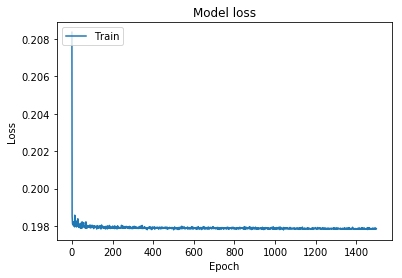

In [12]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Depth d=4

In [13]:
model4 = Sequential()
model4.add(Dense(20, input_dim=1, activation='relu',
                bias_initializer='zeros'))
model4.add(Dense(20, activation='relu',bias_initializer='zeros'))
model4.add(Dense(20, activation='relu',bias_initializer='zeros'))
model4.add(Dense(20, activation='relu',bias_initializer='zeros'))
model4.add(Dense(20, activation='relu',bias_initializer='zeros'))
model4.add(Dense(1, activation='linear'))

In [14]:
model4.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

history=model4.fit(x_train, y_train,
          epochs=1500,
          batch_size=80,verbose=1)

Epoch 1/1500
10000/10000 [==============================] - 0s 47us/step - loss: 0.2074 - accuracy: 0.0000e+00
Epoch 2/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1983 - accuracy: 0.0000e+00
Epoch 3/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1982 - accuracy: 0.0000e+00
Epoch 4/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1982 - accuracy: 0.0000e+00
Epoch 5/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1984 - accuracy: 0.0000e+00
Epoch 6/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1982 - accuracy: 0.0000e+00
Epoch 7/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 8/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1981 - accuracy: 0.0000e+00
Epoch 9/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1980 - accuracy: 0.0000e+00
E

10000/10000 [==============================] - 0s 24us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 147/1500
10000/10000 [==============================] - 0s 24us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 148/1500
10000/10000 [==============================] - 0s 24us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 149/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 150/1500
10000/10000 [==============================] - 0s 24us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 151/1500
10000/10000 [==============================] - 0s 24us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 152/1500
10000/10000 [==============================] - 0s 24us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 153/1500
10000/10000 [==============================] - 0s 25us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 154/1500
10000/10000 [==============================] - 0s 24us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 20us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 291/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 292/1500
10000/10000 [==============================] - 0s 25us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 293/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 294/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 295/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 296/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 297/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 298/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 435/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 436/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 437/1500
10000/10000 [==============================] - 0s 27us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 438/1500
10000/10000 [==============================] - 0s 24us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 439/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 440/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 441/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 442/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 21us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 579/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 580/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 581/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 582/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 583/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 584/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 585/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 586/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 723/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 724/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 725/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 726/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 727/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 728/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 729/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 730/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 867/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 868/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 869/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 870/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 871/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 872/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 873/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 874/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 22us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1011/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1012/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1013/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1014/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1015/1500
10000/10000 [==============================] - 0s 32us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1016/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1017/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1018/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1978 - accuracy: 0

10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1083/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1084/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1085/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1086/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1087/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1088/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1089/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1090/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0

10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1155/1500
10000/10000 [==============================] - 0s 44us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1156/1500
10000/10000 [==============================] - 0s 32us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1157/1500
10000/10000 [==============================] - 0s 38us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1158/1500
10000/10000 [==============================] - 0s 24us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1159/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1160/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1161/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1162/1500
10000/10000 [==============================] - 0s 44us/step - loss: 0.1978 - accuracy: 0

10000/10000 [==============================] - 0s 43us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1227/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1228/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1229/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1230/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1231/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1232/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1233/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1234/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 21us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1299/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1300/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1301/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1302/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1303/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1304/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1305/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1306/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0

10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1371/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1372/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1373/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1374/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1375/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1376/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1377/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1378/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1978 - accuracy: 0

10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1443/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1444/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1445/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1446/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1447/1500
10000/10000 [==============================] - 0s 21us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1448/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1449/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1450/1500
10000/10000 [==============================] - 0s 20us/step - loss: 0.1978 - accuracy: 0

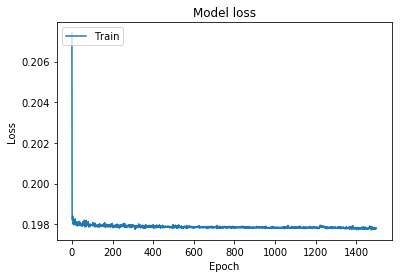

In [15]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Depth d=5

In [16]:
model5 = Sequential()
model5.add(Dense(20, input_dim=1, activation='relu',
                bias_initializer='zeros'))
model5.add(Dense(20, activation='relu',bias_initializer='zeros'))
model5.add(Dense(20, activation='relu',bias_initializer='zeros'))
model5.add(Dense(20, activation='relu',bias_initializer='zeros'))
model5.add(Dense(20, activation='relu',bias_initializer='zeros'))
model5.add(Dense(20, activation='relu',bias_initializer='zeros'))
model5.add(Dense(1, activation='linear'))

In [17]:
model5.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

history=model5.fit(x_train, y_train,
          epochs=1500,
          batch_size=80,verbose=1)

Epoch 1/1500
10000/10000 [==============================] - 0s 49us/step - loss: 0.2051 - accuracy: 0.0000e+00
Epoch 2/1500
10000/10000 [==============================] - 0s 24us/step - loss: 0.1982 - accuracy: 0.0000e+00
Epoch 3/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1982 - accuracy: 0.0000e+00
Epoch 4/1500
10000/10000 [==============================] - 0s 25us/step - loss: 0.1985 - accuracy: 0.0000e+00
Epoch 5/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1983 - accuracy: 0.0000e+00
Epoch 6/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1982 - accuracy: 0.0000e+00
Epoch 7/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1982 - accuracy: 0.0000e+00
Epoch 8/1500
10000/10000 [==============================] - 0s 24us/step - loss: 0.1982 - accuracy: 0.0000e+00
Epoch 9/1500
10000/10000 [==============================] - 0s 24us/step - loss: 0.1980 - accuracy: 0.0000e+00
E

10000/10000 [==============================] - 0s 31us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 147/1500
10000/10000 [==============================] - 0s 24us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 148/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 149/1500
10000/10000 [==============================] - 0s 24us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 150/1500
10000/10000 [==============================] - 0s 24us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 151/1500
10000/10000 [==============================] - 0s 24us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 152/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 153/1500
10000/10000 [==============================] - 0s 25us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 154/1500
10000/10000 [==============================] - 0s 27us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 23us/step - loss: 0.1980 - accuracy: 0.0000e+00
Epoch 291/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 292/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 293/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 294/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 295/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 296/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 297/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 298/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 435/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 436/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 437/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 438/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 439/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 440/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 441/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 442/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 579/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 580/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 581/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 582/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 583/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 584/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 585/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 586/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 723/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 724/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 725/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 726/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 727/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 728/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 729/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 730/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1978 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 867/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 868/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 869/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 870/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 871/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 872/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 873/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 874/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+0

10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1011/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1012/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1013/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1014/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1015/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1016/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1017/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1018/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 24us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1083/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1084/1500
10000/10000 [==============================] - 0s 25us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1085/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1086/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1087/1500
10000/10000 [==============================] - 0s 27us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1088/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1089/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1090/1500
10000/10000 [==============================] - 0s 26us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1155/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1156/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1157/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1158/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1159/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1160/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1161/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1162/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 22us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1227/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1228/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1229/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1230/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1231/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1232/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1233/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1234/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 21us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1299/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1300/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1301/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1302/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1303/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1304/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1305/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1306/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1371/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1372/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1373/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1374/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1375/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1376/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1377/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1378/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0

10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1443/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1444/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1445/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1446/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1978 - accuracy: 0.0000e+00
Epoch 1447/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1448/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1449/1500
10000/10000 [==============================] - 0s 23us/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 1450/1500
10000/10000 [==============================] - 0s 22us/step - loss: 0.1979 - accuracy: 0

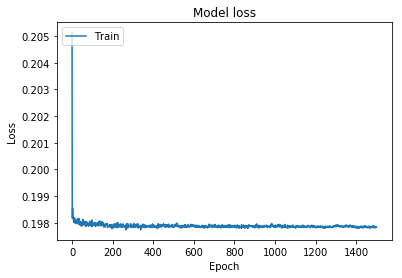

In [18]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Plot Classifcation Error vs Depth for the above regression task

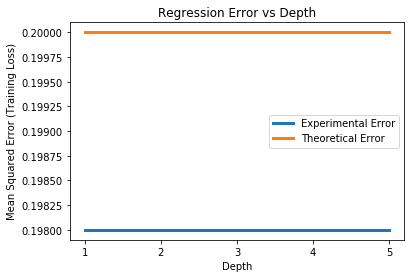

In [24]:
#The values below are obtained from the above training data. The value obtained at the last epoch (approximately)
err_task=np.array([0.1980,0.1980,0.1980,0.1980,0.1980]) 
err_theory=np.array([0.2,0.2,0.2,0.2,0.2]) #Approximate error from theory
depth=np.array([1,2,3,4,5])
line_emp, = plt.plot(depth,err_task,linewidth=3,label='Experimental Error')
line_theory, = plt.plot(depth,err_theory,linewidth=3,label='Theoretical Error')
plt.title('Regression Error vs Depth')
plt.ylabel('Mean Squared Error (Training Loss)')
plt.xlabel('Depth')
plt.legend(handles=[line_emp, line_theory])
plt.xticks(np.arange(1, 6, 1))
plt.show()